## Abstract Sapientino with Restraining Bolts.

Level of abstraction "zero", with restraining bolts.

The goal is to visit N colors in a certain order.

In [1]:
%matplotlib inline

from multinav.helpers.gym import rollout
from multinav.algorithms.value_iteration import value_iteration
from multinav.wrappers.temprl import MyTemporalGoalWrapper

import random
from multinav.envs.env_abstract_sapientino import AbstractSapientino, AbstractSapientinoTemporalGoal
from multinav.envs.temporal_goals import SapientinoGoal
from multinav.helpers.notebooks import print_env, print_automaton

pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


For value iteration, we need the enviornment with the full explicit model.

Observation space: MultiDiscrete([4 5])
Action space: Discrete(5)


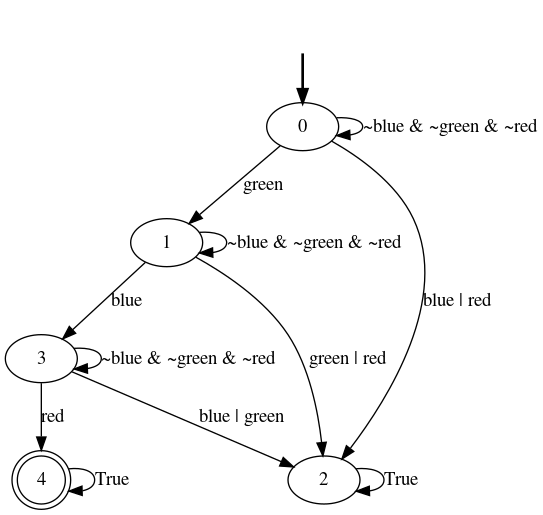

In [2]:
nb_colors = 3
env = AbstractSapientinoTemporalGoal(nb_colors=nb_colors, failure_probability=0.1)

# View env
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print_automaton(env.temporal_goal.automaton)

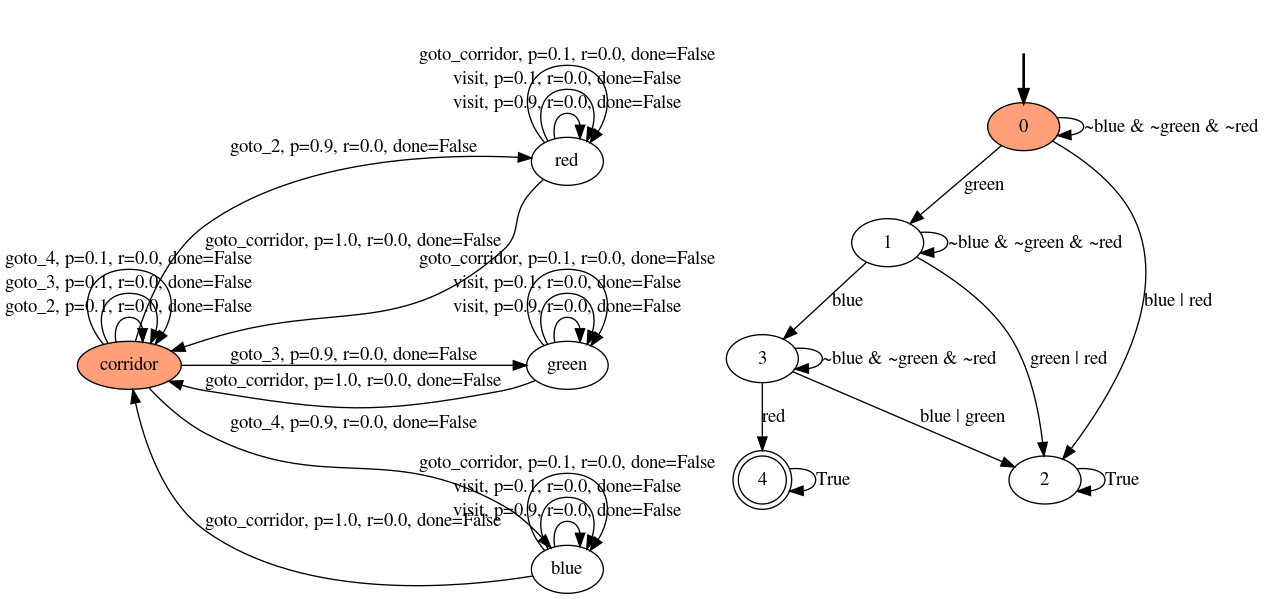

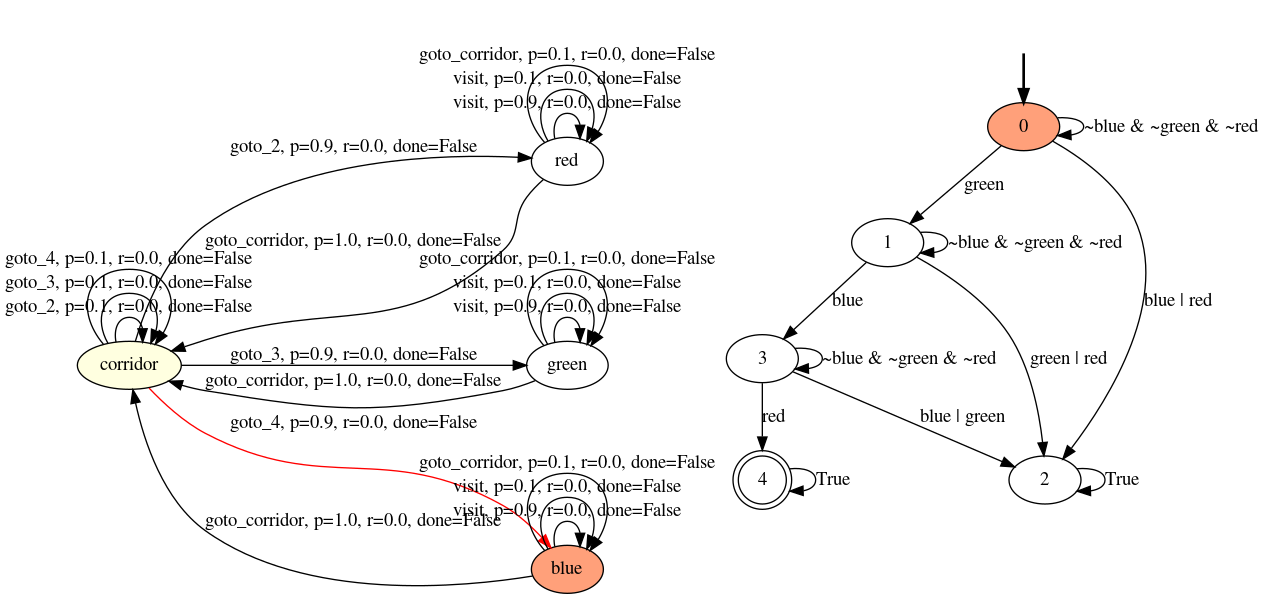

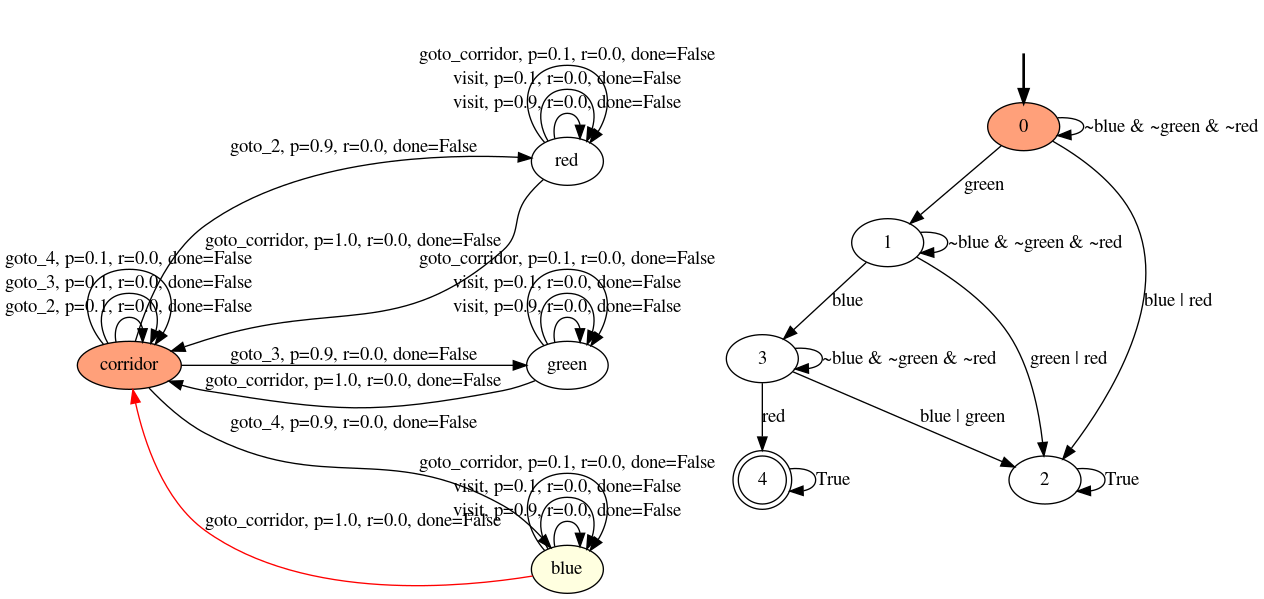

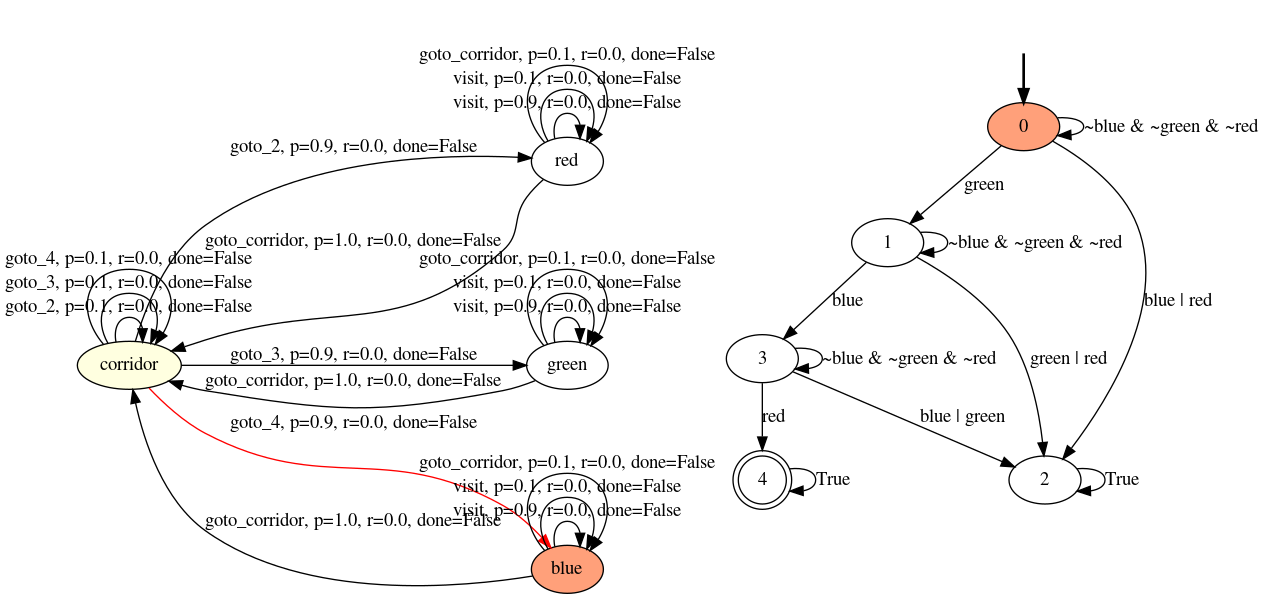

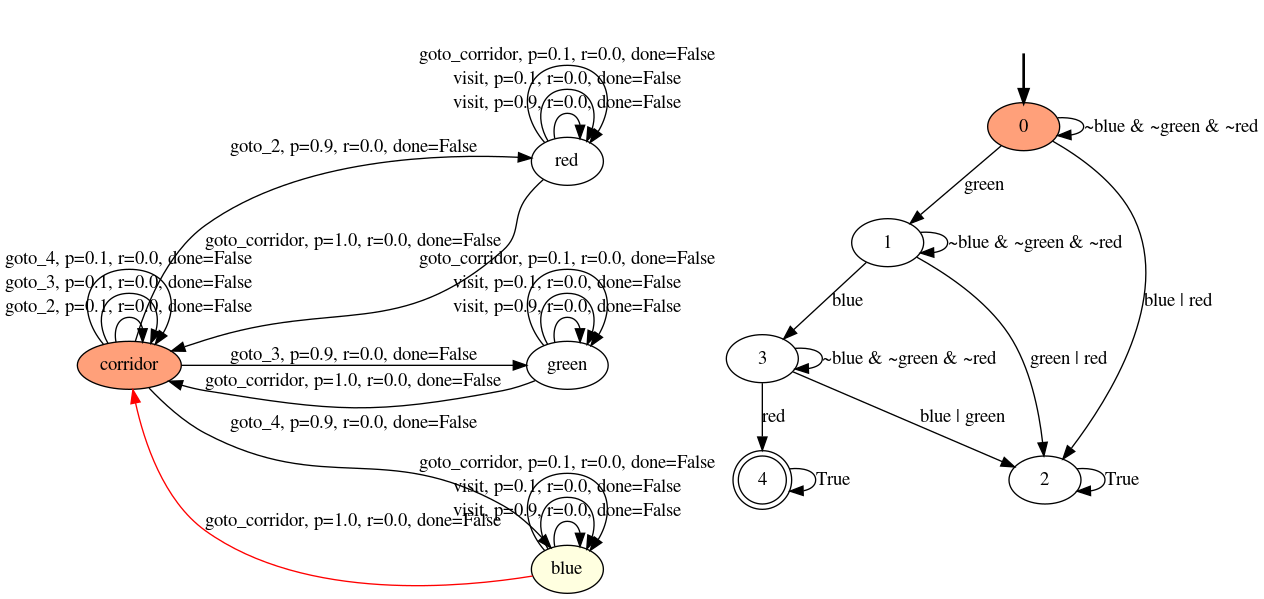

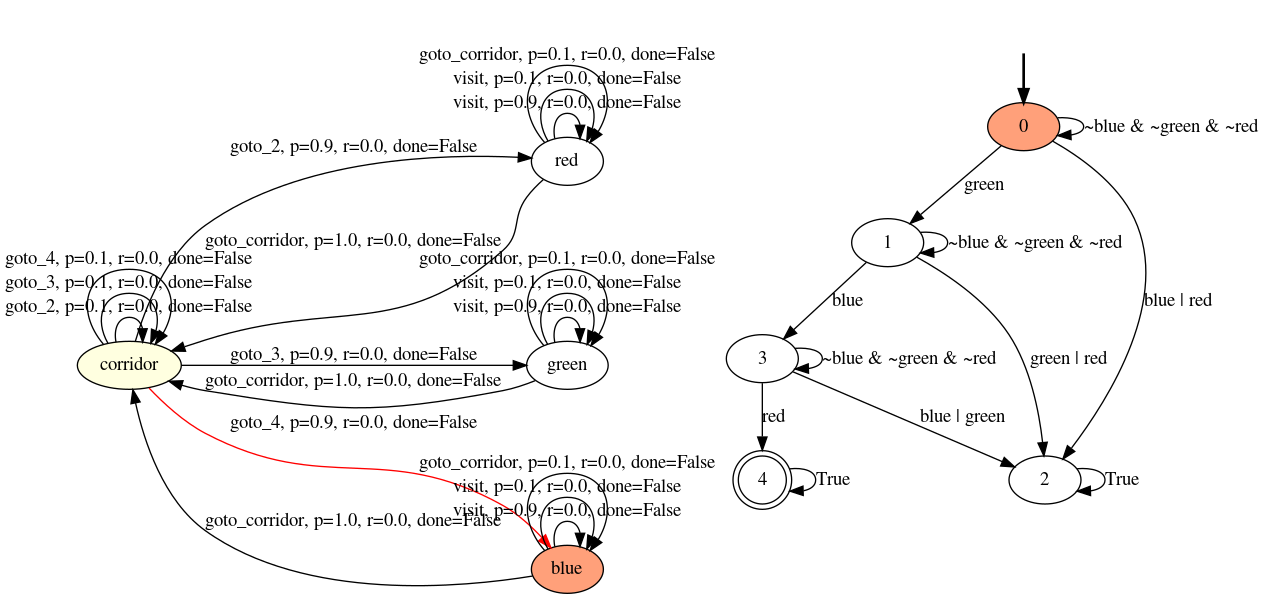

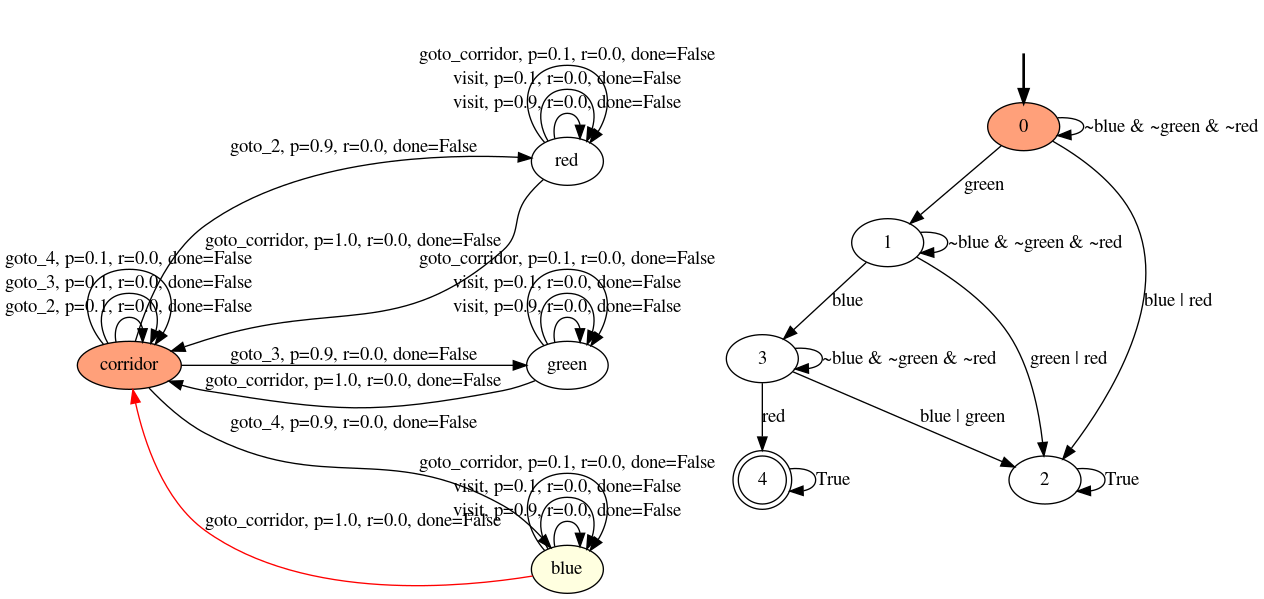

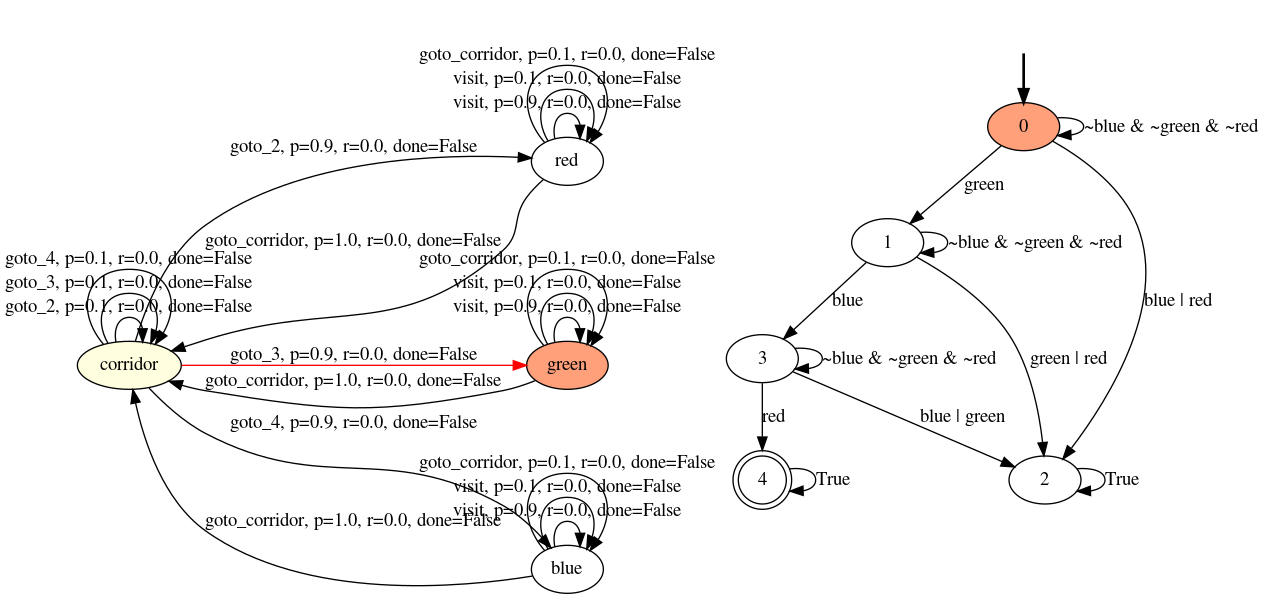

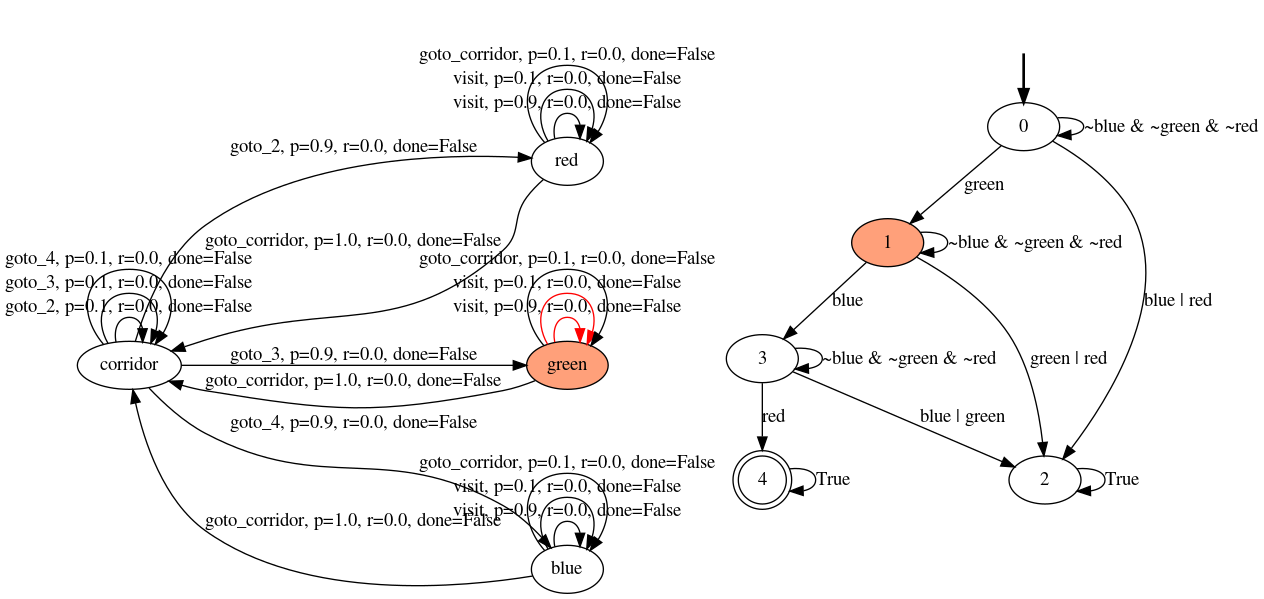

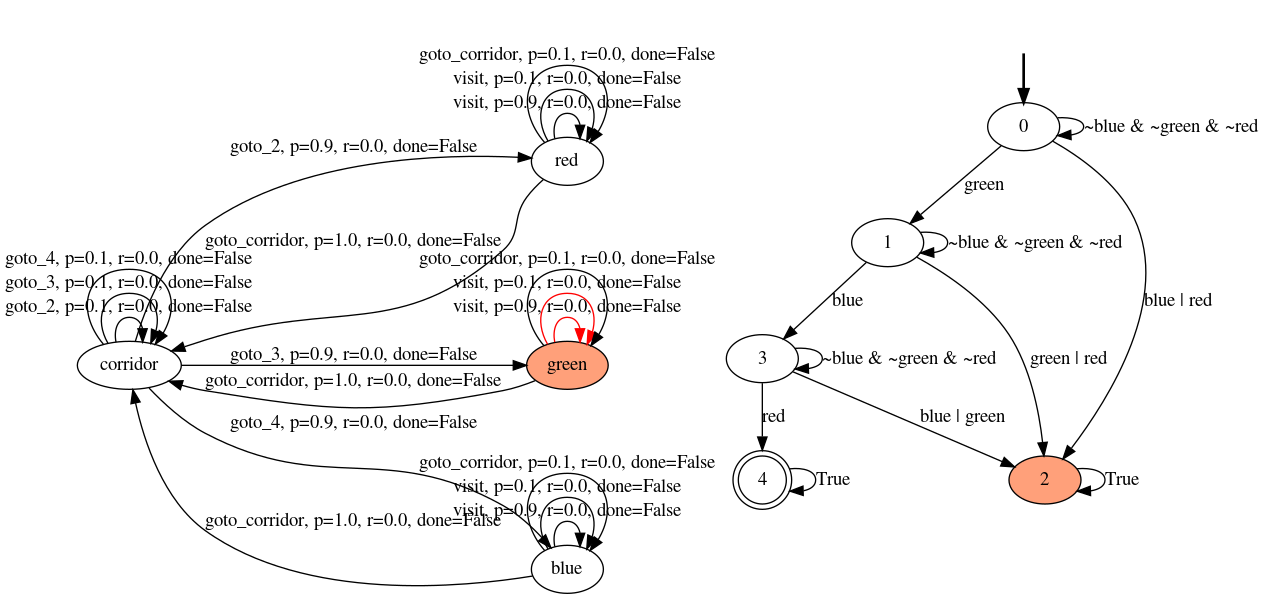

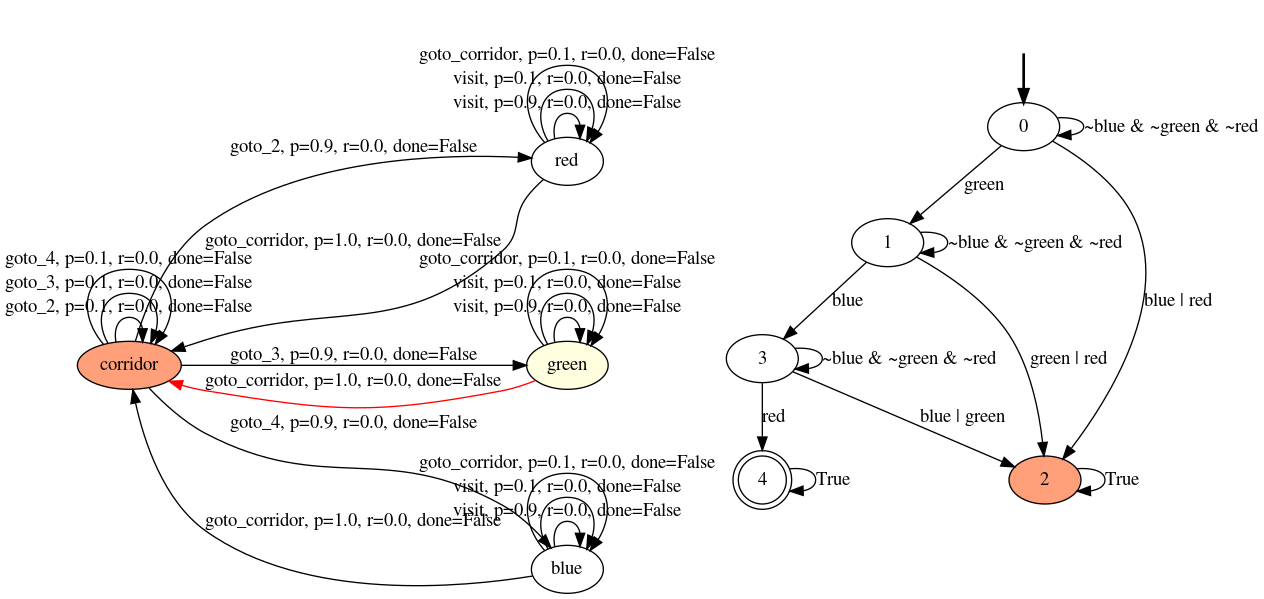

In [3]:
# Random transitions
state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state)))
    state, reward, done, info = env.step(action)
    print_env(env)

In [4]:
# Some iterations
value, policy = value_iteration(env, discount=0.9, max_iterations=200)
print(f"Learned value function:")
for s,v in value.items():
    print(f"s={s}, v={v}")

Learned value function:
s=(0, 0), v=9.33180374269069
s=(0, 1), v=11.909085686484003
s=(0, 2), v=7.518184657602221e-11
s=(0, 3), v=15.198160822747065
s=(0, 4), v=18.173389432225335
s=(1, 0), v=9.229246856383318
s=(1, 1), v=11.77820650169538
s=(1, 2), v=7.924862462585388e-11
s=(1, 3), v=17.074488333324236
s=(1, 4), v=19.182461830048496
s=(2, 0), v=10.483888502484017
s=(2, 1), v=11.77820650169538
s=(2, 2), v=7.924862462585388e-11
s=(2, 3), v=15.031137408195743
s=(2, 4), v=19.182461830048496
s=(3, 0), v=9.229246856383318
s=(3, 1), v=13.379353955324998
s=(3, 2), v=7.924862462585388e-11
s=(3, 3), v=15.031137408195743
s=(3, 4), v=19.182461830048496


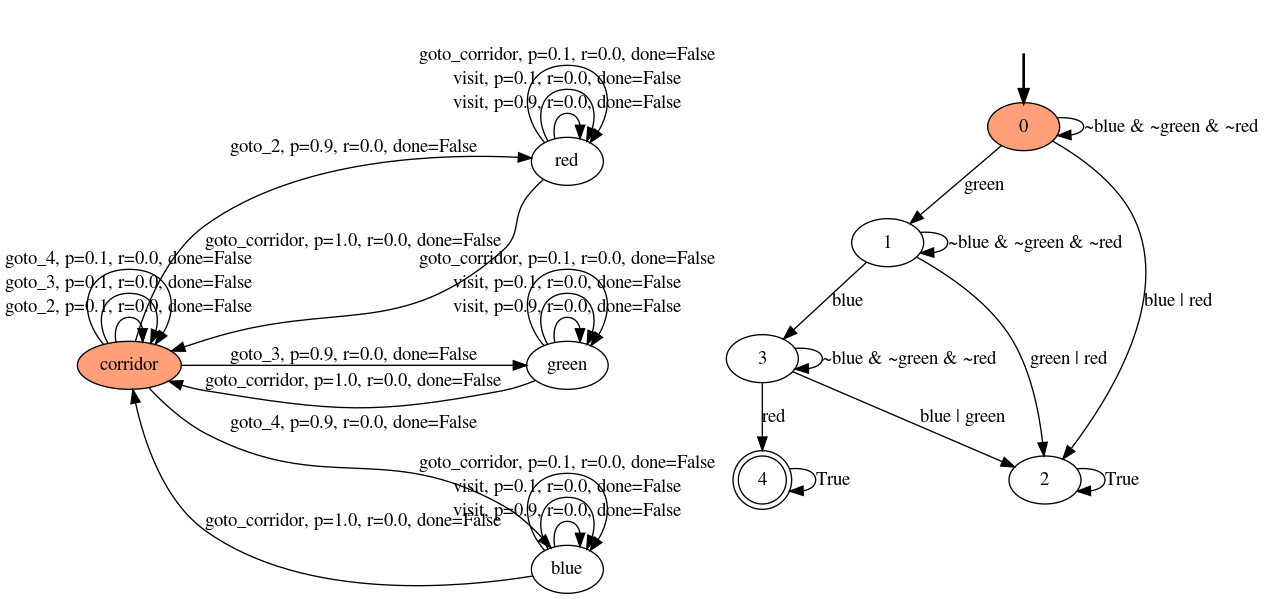

s=(0, 0), r=00.0, value=09.33


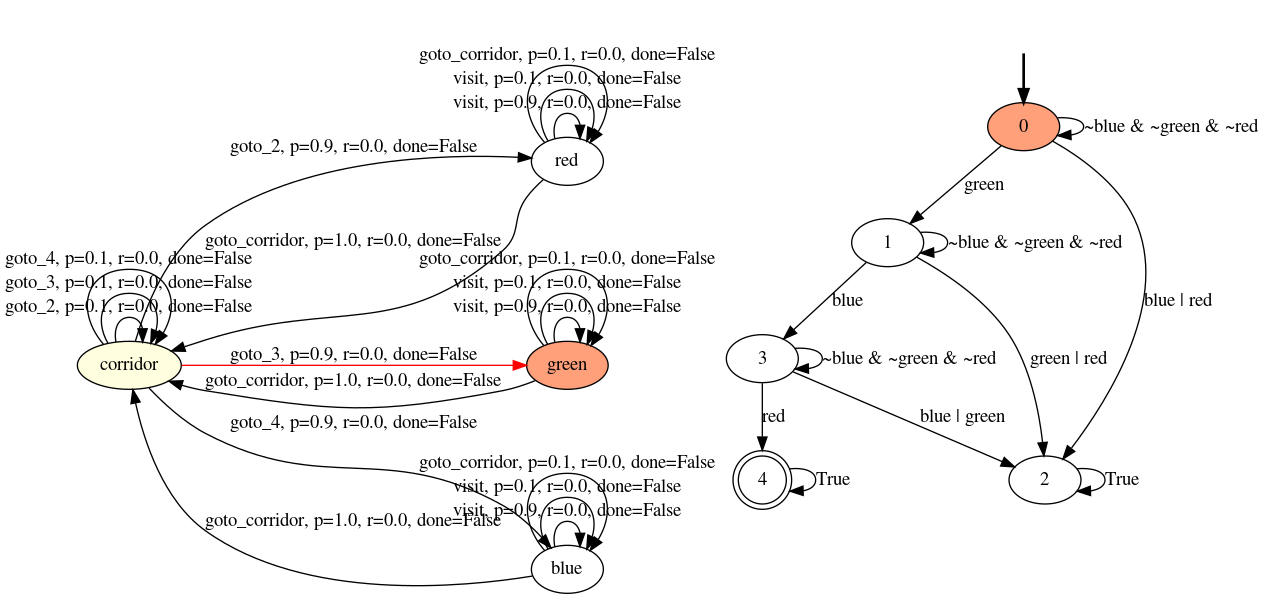

s=(2, 0), r=00.0, value=10.48


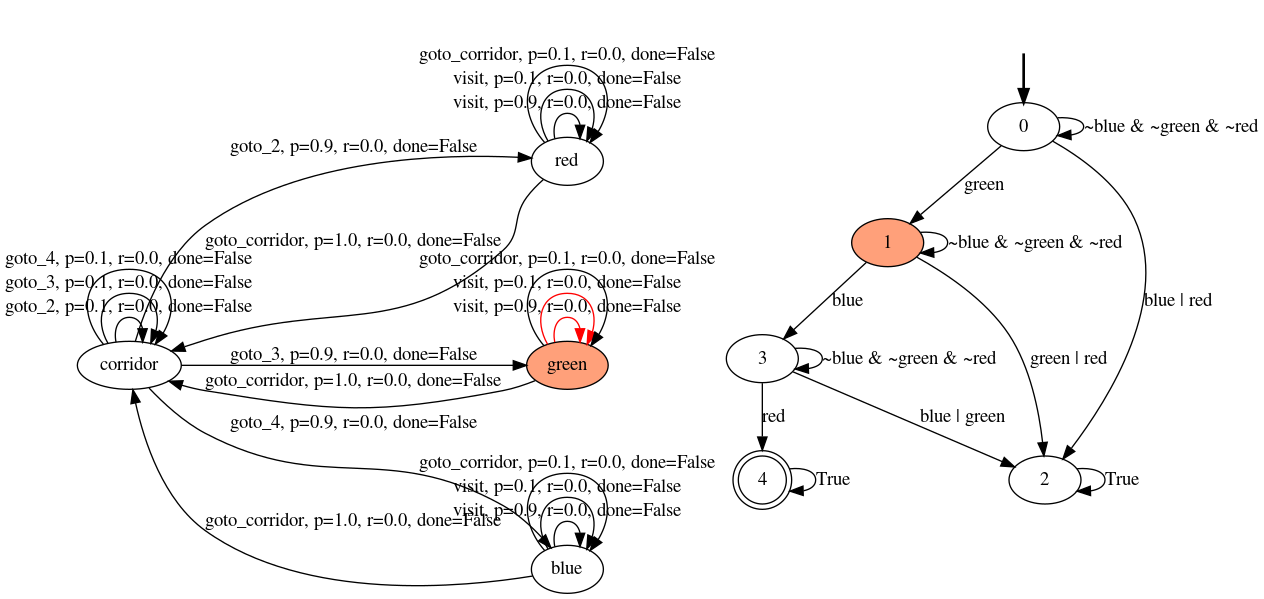

s=(2, 1), r=00.0, value=11.78


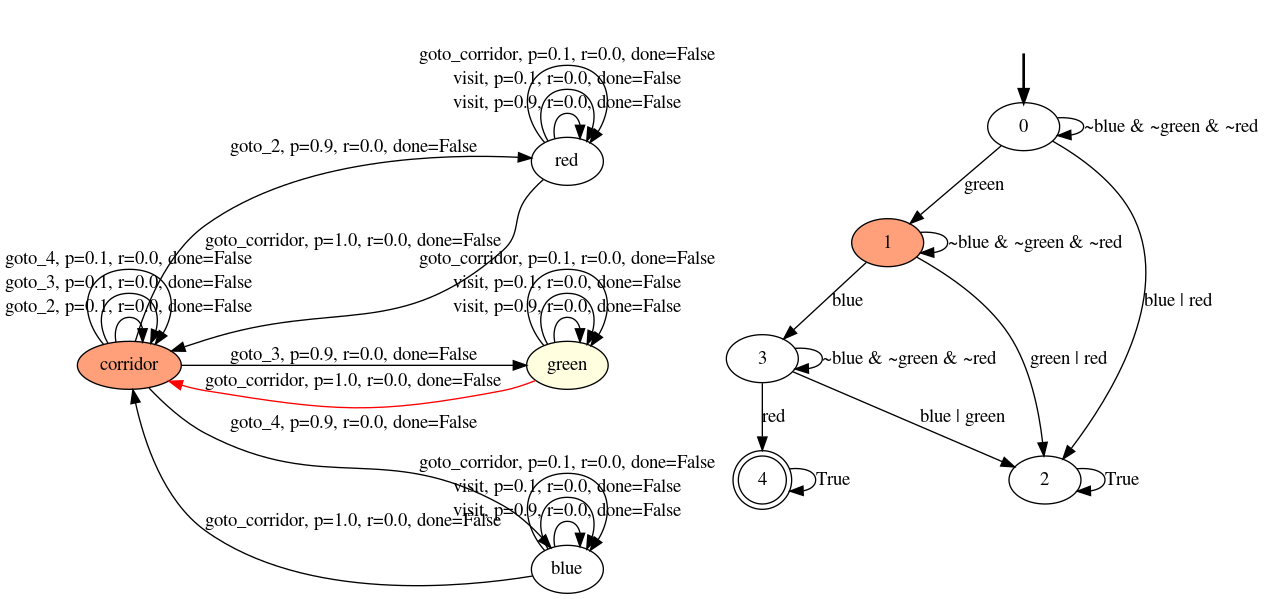

s=(0, 1), r=00.0, value=11.91


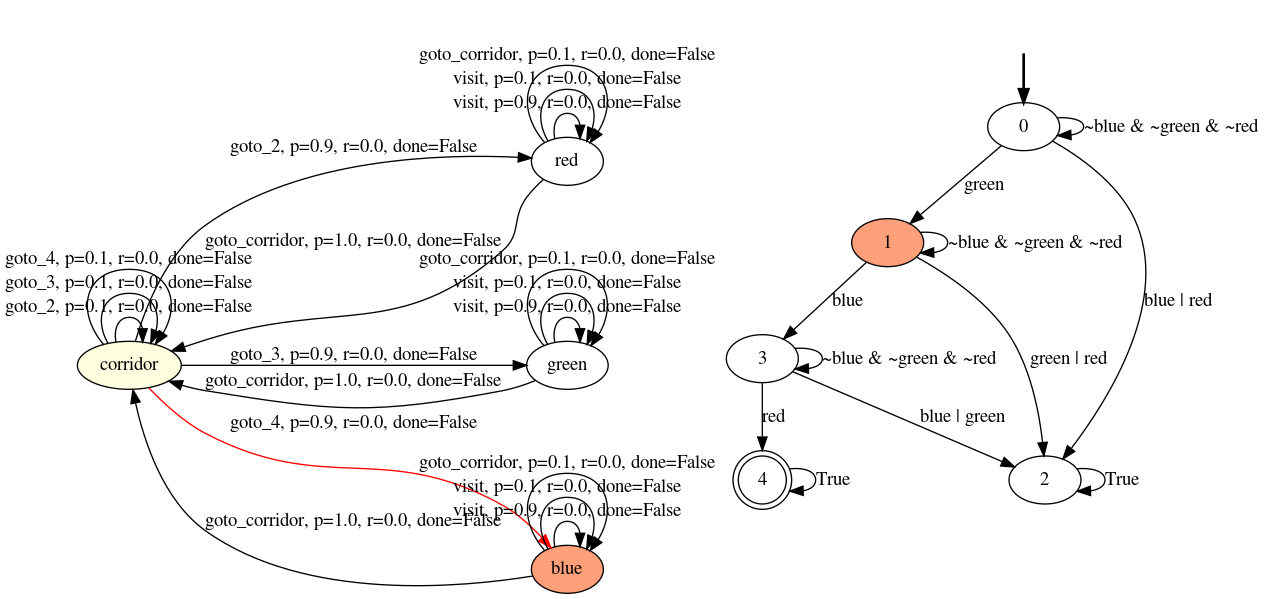

s=(3, 1), r=00.0, value=13.38


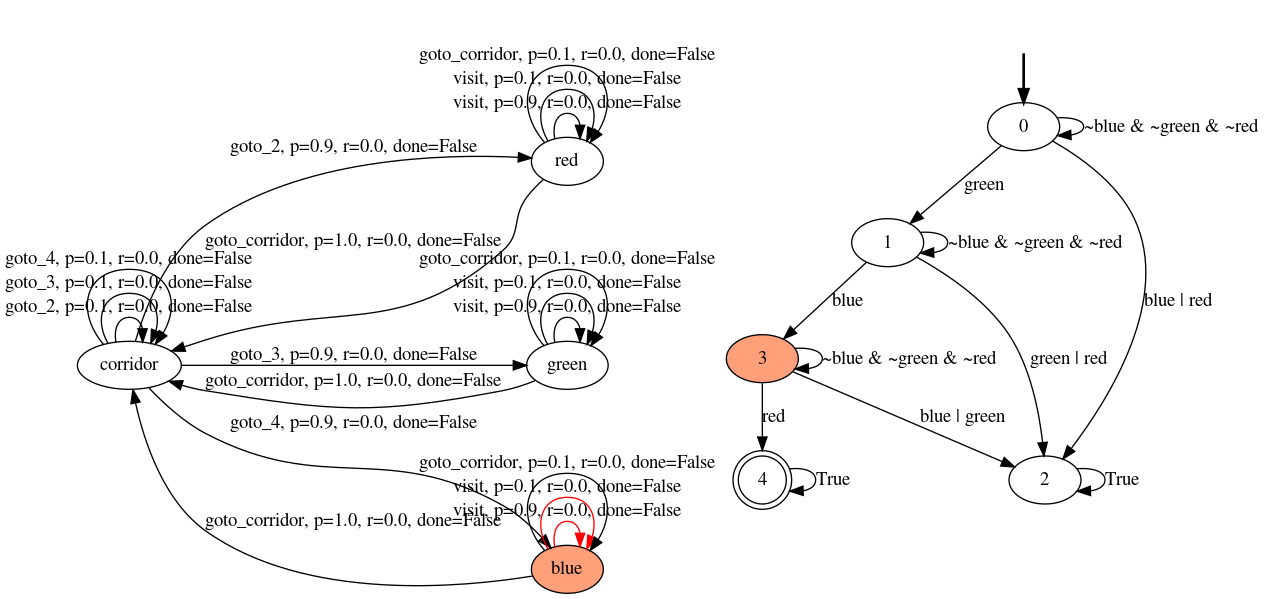

s=(3, 3), r=00.0, value=15.03


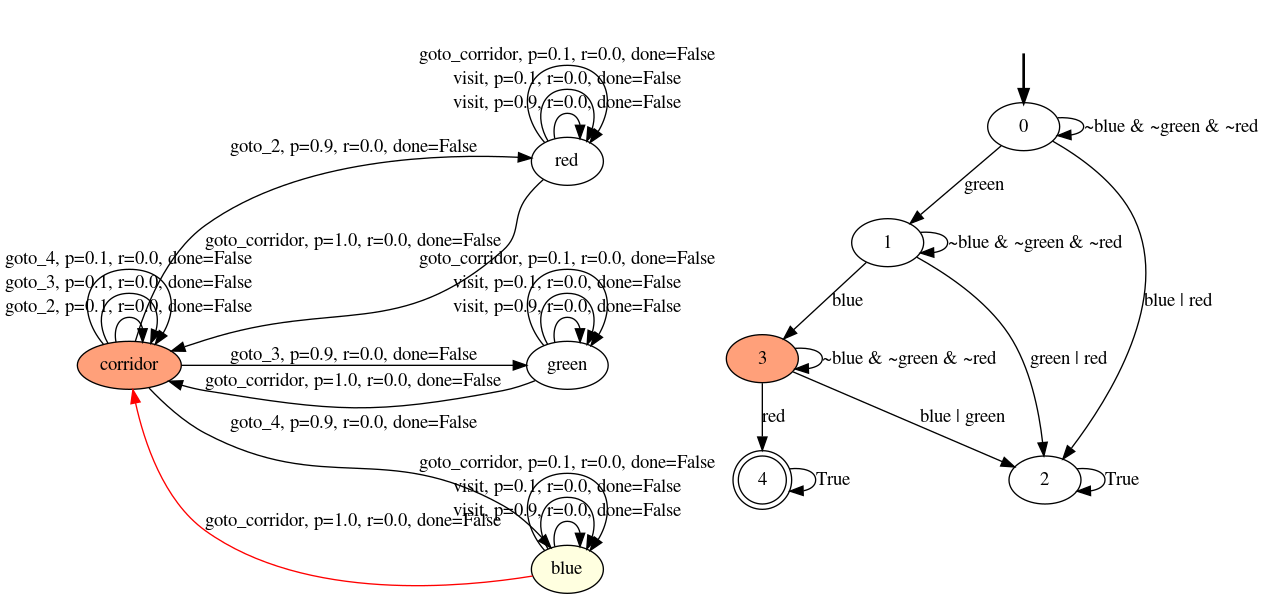

s=(0, 3), r=00.0, value=15.20


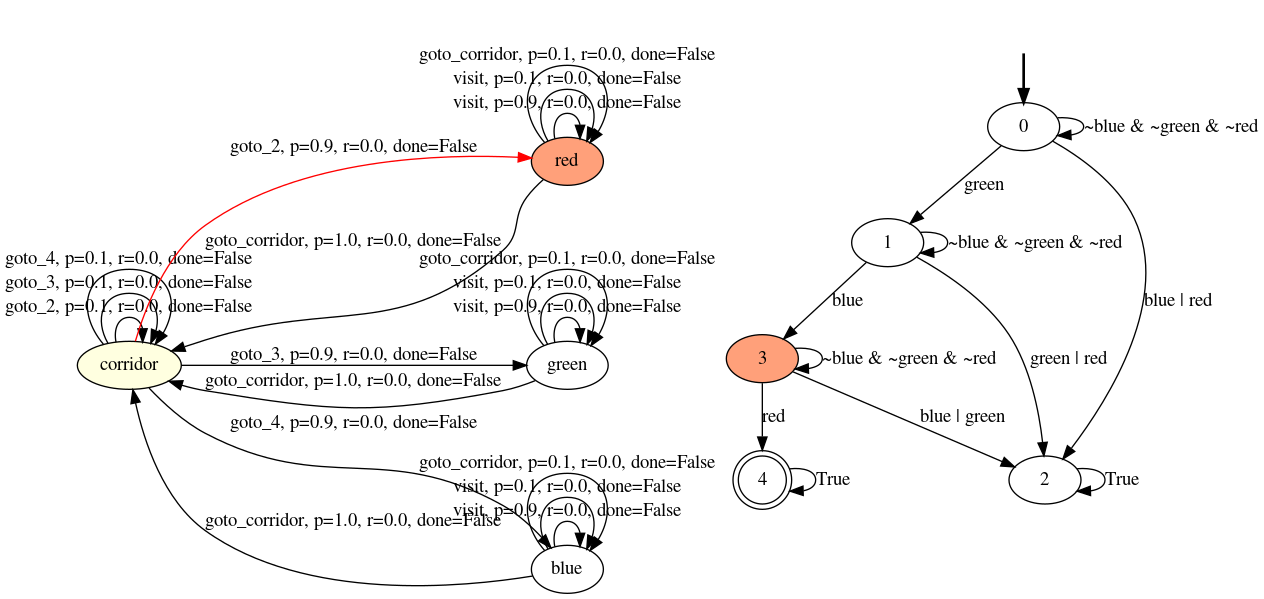

s=(1, 3), r=00.0, value=17.07


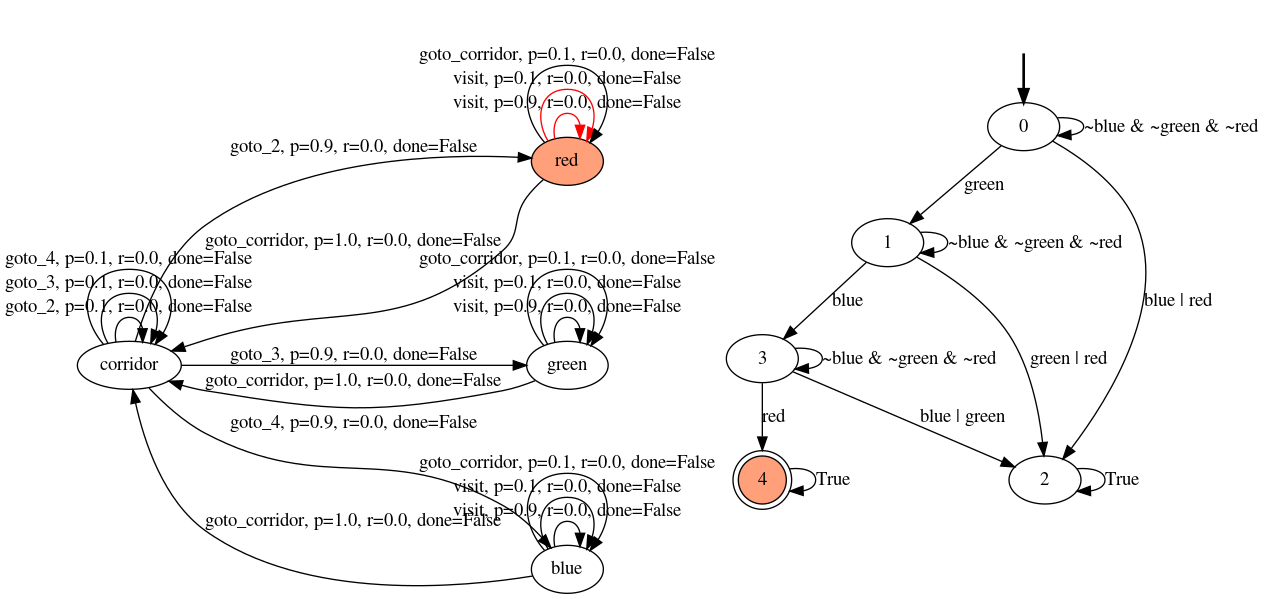

s=(1, 4), r=02.0, value=19.18


In [5]:
def step_callback(env, step):
    print_env(env)
    state, reward, done, info = step
    print(f"s={state}, r={reward:04.1f}, value={value[state]:05.2f}")

rollout(env, policy=lambda _env, _state: policy[_state], callback=step_callback)